### Step 1 : Import Liabraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
import seaborn as sns

### Import Dataset

In [2]:
import os
os.chdir('Desktop')

In [3]:
data = pd.read_csv('heart_failure.csv')

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Step 2: Exploratory Analysis

In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:>

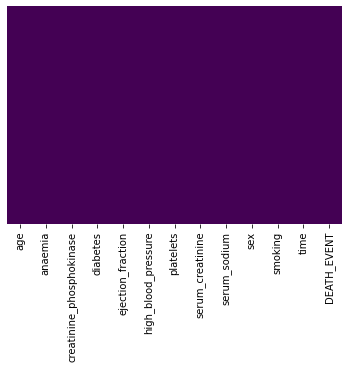

In [8]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# Death Event column is in uppercase and rest columns are in lower case so converting it in lower case to make it standard
data.columns = data.columns.str.lower()

<AxesSubplot:xlabel='smoking', ylabel='count'>

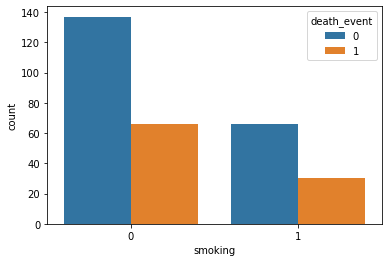

In [10]:
sns.countplot(x='smoking',hue='death_event',data=data)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

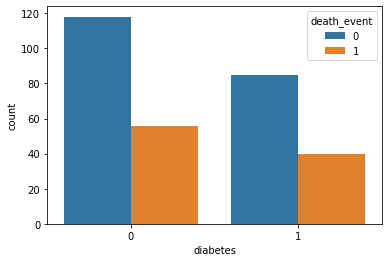

In [11]:
sns.countplot(x='diabetes',hue='death_event',data=data)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

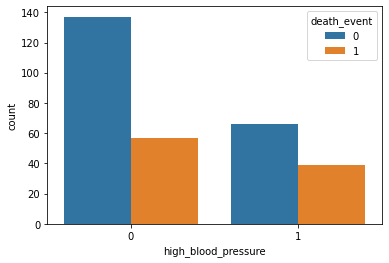

In [12]:
sns.countplot(x='high_blood_pressure',hue='death_event',data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

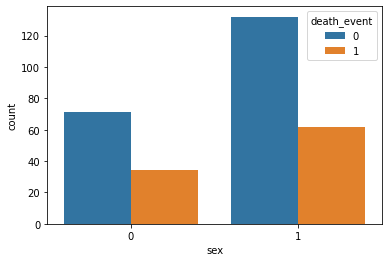

In [13]:
sns.countplot(x='sex',hue='death_event',data=data)

### After plotting above plots it looks mostly male patients which have high BP and Diabetes have higher risk of death.

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='anaemia', ylabel='age'>,
        <AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='age'>,
        <AxesSubplot:xlabel='diabetes', ylabel='age'>,
        <AxesSubplot:xlabel='ejection_fraction', ylabel='age'>,
        <AxesSubplot:xlabel='high_blood_pressure', ylabel='age'>,
        <AxesSubplot:xlabel='platelets', ylabel='age'>,
        <AxesSubplot:xlabel='serum_creatinine', ylabel='age'>,
        <AxesSubplot:xlabel='serum_sodium', ylabel='age'>,
        <AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='smoking', ylabel='age'>,
        <AxesSubplot:xlabel='time', ylabel='age'>,
        <AxesSubplot:xlabel='death_event', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='anaemia'>,
        <AxesSubplot:xlabel='anaemia', ylabel='anaemia'>,
        <AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='anaemia'>,
        <AxesSubplot:xlabel='diabetes', ylabel='anaemia'>,
  

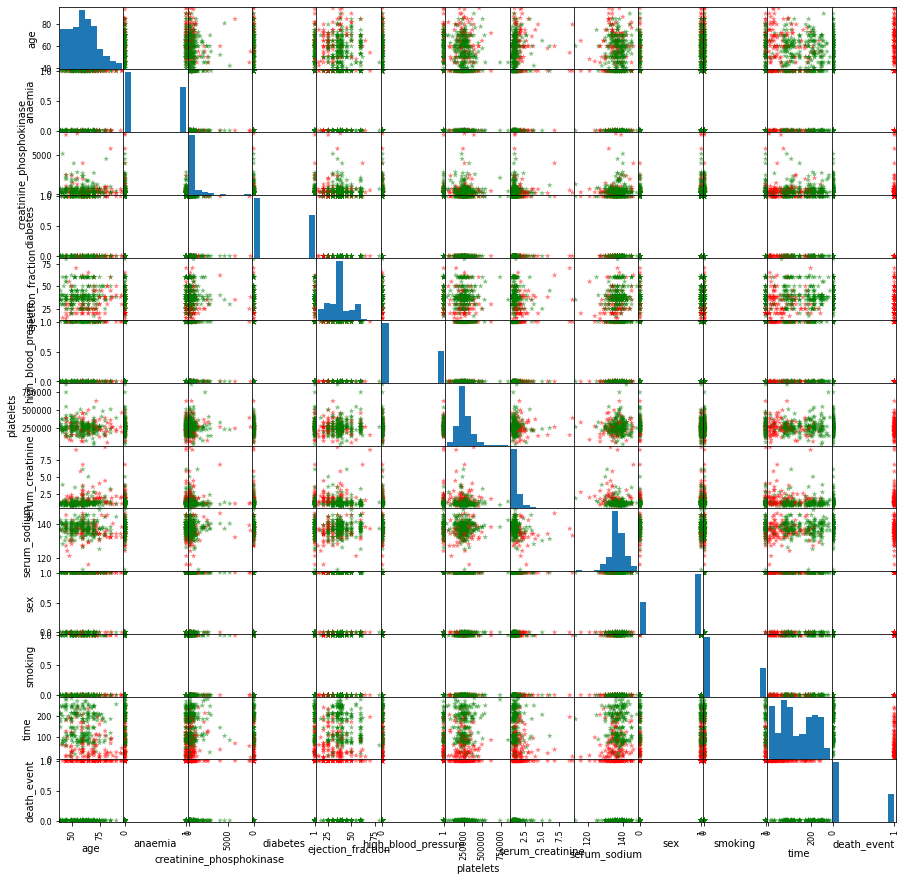

In [15]:
import matplotlib.pyplot as plt
color=["red" if i==1 else "green" for i in data.death_event]
pd.plotting.scatter_matrix(data, alpha=0.5,figsize=[15,15],diagonal="hist",marker="*", c=color)

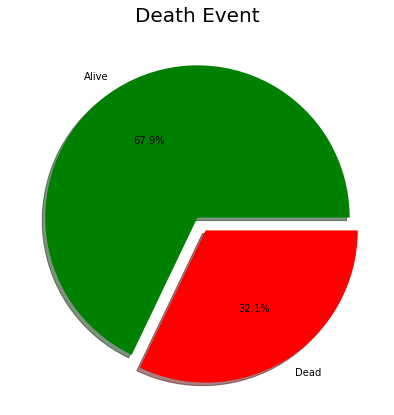

In [16]:
plt.figure(figsize=(7,7))
plt.pie(data['death_event'].value_counts(),labels=['Alive','Dead'],autopct='%1.1f%%',shadow=True,explode=[0,0.1], colors = ['green','red'])
plt.title('Death Event',fontsize=20)
plt.show()

In [17]:
features_mean= list(data.columns[0:13])

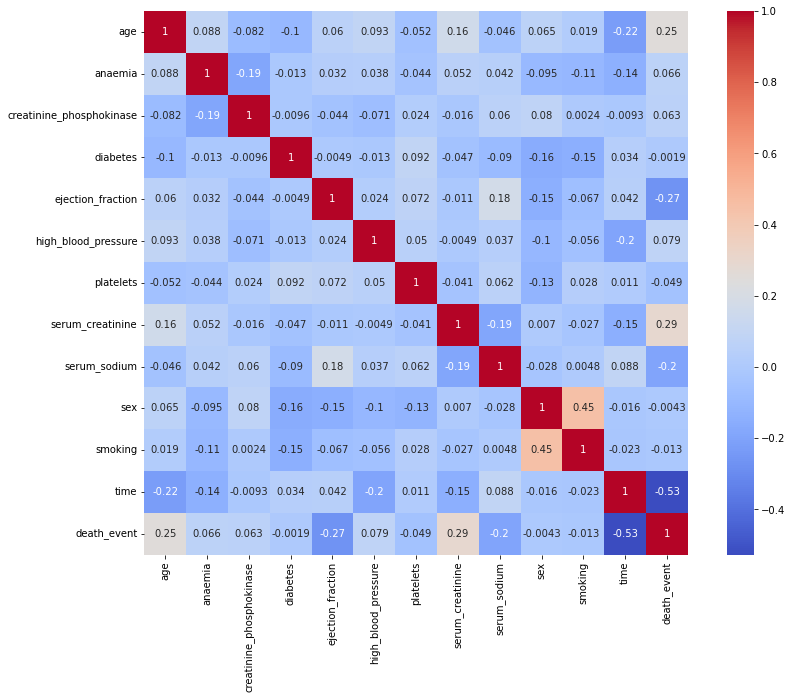

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

### Step 3: Split the Data into train and test

In [19]:
    x_n= (data - np.min(data))/(np.max(data)- np.min(data))
    X = data.drop('death_event' , axis=1)
    y = data['death_event']

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


### Model 1: Support Vector Machine

In [20]:
# Split the Ratio into Training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 442)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=1)
from sklearn.svm import SVC
svm= SVC(random_state=1)
svm.fit(X_train,y_train)
print("Accuracy of SVM:", svm.score(X_test,y_test))

Accuracy of SVM: 0.7666666666666667


### Model 2: Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=3000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [24]:
LogisticRegression(max_iter=3000)

LogisticRegression(max_iter=3000)

In [27]:
predictions = logmodel.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



### Model 3: K Nearest Neighbours

In [30]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
X = data.drop('death_event' , axis=1)
y = data['death_event']

In [31]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [32]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.5333333333333333


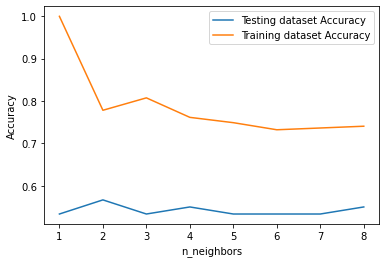

In [33]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### Model 4: Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X,y)
print("Accuracy of Naive_Bayes classification: ", nb.score(X,y))

Accuracy of Naive_Bayes classification:  0.8093645484949833


### Model 5: Decision Tree Classification

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Accuracy of DecisionTreeClassifier: ", dt.score(X_test,y_test))

Accuracy of DecisionTreeClassifier:  0.6666666666666666


### Model 6: Random Forest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=25, random_state=42)
rf.fit(X_train,y_train)
print("Accuracy of RandomForestClassifier:",rf.score(X_test,y_test))

Accuracy of RandomForestClassifier: 0.7166666666666667


### Confusion Matrix

In [38]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [39]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

# summarize components
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

In [40]:
# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

In [41]:
# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\n➔ The classifier accuracy score is {:03.2f}\n'.format(classifier_score))


➔ The classifier accuracy score is 0.81



In [42]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)

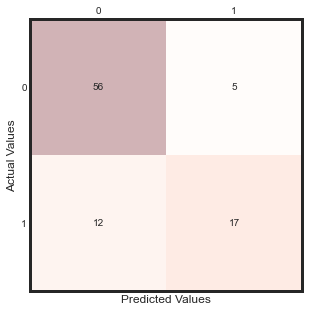

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        61
           1       0.77      0.59      0.67        29

    accuracy                           0.81        90
   macro avg       0.80      0.75      0.77        90
weighted avg       0.81      0.81      0.80        90



In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

# Models Summary
Support Vector Machine - 76%,
Logistic Regression - 88%,
K Nearest Neighbours - 53.33%,
Naive Bayes - 80.93%,
Decision Tree - 66%,
Random Forest - 71.66 %

### Conlsusion : Logistic regression provided high accuracy from all the models which is 88%